## Just exploring data

In [2]:
import polars as pl
import sqlite3
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# from bimodal.cli import YEAR_FILES, load_and_clean_raw

In [3]:
data = pl.read_parquet("../data/counter_data.parquet")

In [31]:
data.filter((pl.col("site_name") == "Adelaide Road") & (pl.col("year") == 2022))

site_id,site_name,record_time,count_incoming,count_outgoing,year,month,day,hour,weekday
i64,str,"datetime[μs, UTC]",i64,i64,i32,u32,u32,u32,u32
100047097,"""Adelaide Road""",2022-01-01 01:00:00 UTC,2,0,2022,1,1,1,6
100047097,"""Adelaide Road""",2022-01-01 02:00:00 UTC,1,1,2022,1,1,2,6
100047097,"""Adelaide Road""",2022-01-01 03:00:00 UTC,1,0,2022,1,1,3,6
100047097,"""Adelaide Road""",2022-01-01 04:00:00 UTC,0,0,2022,1,1,4,6
100047097,"""Adelaide Road""",2022-01-01 05:00:00 UTC,1,0,2022,1,1,5,6
100047097,"""Adelaide Road""",2022-01-01 06:00:00 UTC,1,0,2022,1,1,6,6
100047097,"""Adelaide Road""",2022-01-01 07:00:00 UTC,1,4,2022,1,1,7,6
100047097,"""Adelaide Road""",2022-01-01 08:00:00 UTC,1,3,2022,1,1,8,6
100047097,"""Adelaide Road""",2022-01-01 09:00:00 UTC,3,3,2022,1,1,9,6


In [28]:
data

site_id,site_name,record_time,count_incoming,count_outgoing,year,month,day,hour,weekday
i64,str,"datetime[μs, UTC]",i64,i64,i32,u32,u32,u32,u32
100047097,"""Adelaide Road""",2018-01-01 01:00:00 UTC,null,null,2018,1,1,1,1
100047097,"""Adelaide Road""",2018-01-01 02:00:00 UTC,null,null,2018,1,1,2,1
100047097,"""Adelaide Road""",2018-01-01 03:00:00 UTC,null,null,2018,1,1,3,1
100047097,"""Adelaide Road""",2018-01-01 04:00:00 UTC,null,null,2018,1,1,4,1
100047097,"""Adelaide Road""",2018-01-01 05:00:00 UTC,null,null,2018,1,1,5,1
100047097,"""Adelaide Road""",2018-01-01 06:00:00 UTC,null,null,2018,1,1,6,1
100047097,"""Adelaide Road""",2018-01-01 07:00:00 UTC,null,null,2018,1,1,7,1
100047097,"""Adelaide Road""",2018-01-01 08:00:00 UTC,null,null,2018,1,1,8,1
100047097,"""Adelaide Road""",2018-01-01 09:00:00 UTC,null,null,2018,1,1,9,1


In [35]:
year_counts = (
    data.lazy().group_by_dynamic(
        "record_time",
        every="1y",
        by="site_name"
    )
    .agg(
        pl.col("count_incoming").sum().alias("ci_sum"),
        pl.col("count_incoming").is_null().sum().alias("ci_null"),
        pl.col("count_incoming").len().alias("ci_len")
    )
).collect()

In [36]:
year_counts

site_name,record_time,ci_sum,ci_null,ci_len
str,"datetime[μs, UTC]",i64,u32,u32
"""Adelaide Road""",2018-01-01 00:00:00 UTC,6653,7477,8759
"""Adelaide Road""",2019-01-01 00:00:00 UTC,30029,2132,8759
"""Adelaide Road""",2020-01-01 00:00:00 UTC,45781,514,8783
"""Adelaide Road""",2021-01-01 00:00:00 UTC,51410,1,8759
"""Adelaide Road""",2022-01-01 00:00:00 UTC,49046,1,8759
"""Adelaide Road""",2023-01-01 00:00:00 UTC,35959,2831,8759
"""Airport Tunnel…",2018-01-01 00:00:00 UTC,55606,1,8759
"""Airport Tunnel…",2019-01-01 00:00:00 UTC,61849,1,8759
"""Airport Tunnel…",2020-01-01 00:00:00 UTC,46542,318,8783


In [40]:
year_counts = (
    data.lazy().group_by_dynamic(
        "record_time",
        every="1y",
        by="site_name"
    )
    .agg(
        (
            pl.col("count_incoming").sum()/pl.col("count_incoming").is_not_null().sum() * 365 + 
            pl.col("count_outgoing").sum()/pl.col("count_outgoing").is_not_null().sum() * 365
        ).alias("year_count")
    )
).collect()

In [41]:
year_counts

site_name,record_time,year_count
str,"datetime[μs, UTC]",f64
"""Adelaide Road""",2018-01-01 00:00:00 UTC,4191.805772
"""Adelaide Road""",2019-01-01 00:00:00 UTC,3581.483326
"""Adelaide Road""",2020-01-01 00:00:00 UTC,4669.387473
"""Adelaide Road""",2021-01-01 00:00:00 UTC,4966.258849
"""Adelaide Road""",2022-01-01 00:00:00 UTC,4758.794816
"""Adelaide Road""",2023-01-01 00:00:00 UTC,5097.13141
"""Airport Tunnel…",2018-01-01 00:00:00 UTC,4318.819365
"""Airport Tunnel…",2019-01-01 00:00:00 UTC,4913.538479
"""Airport Tunnel…",2020-01-01 00:00:00 UTC,4016.470502


/Users/henry/Library/Caches/pypoetry/virtualenvs/bimodal-PfPPmpNm-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henry/Library/Caches/pypoetry/virtualenvs/bimodal-PfPPmpNm-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henry/Library/Caches/pypoetry/virtualenvs/bimodal-PfPPmpNm-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/henry/Library/Caches/pypoetry/virtualenvs/bimoda

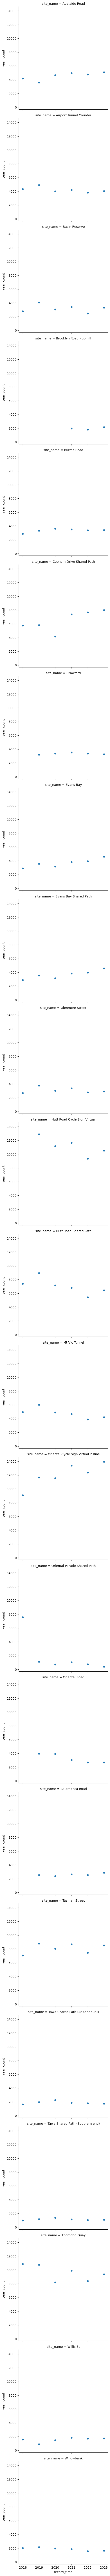

In [42]:
sns.relplot(year_counts, x="record_time", y="year_count", row="site_name")

In [4]:
(
    data.with_columns(
        pl.col("record_time").str.to_datetime()
    )
    .filter(
        (pl.col("site_name") == "Basin Reserve") & 
        (pl.col("record_time").dt.year() == 2021) &
        (pl.col("record_time").dt.month() == 8)
    )
)

thread '<unnamed>' panicked at /Users/runner/work/polars/polars/crates/polars-plan/src/dsl/function_expr/strings.rs:555:41:
called `Result::unwrap()` on an `Err` value: SchemaMismatch(ErrString("invalid series dtype: expected `Utf8`, got `datetime[μs, UTC]`"))
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


PanicException: called `Result::unwrap()` on an `Err` value: SchemaMismatch(ErrString("invalid series dtype: expected `Utf8`, got `datetime[μs, UTC]`"))

In [ ]:
RAW_DATA_PATH = Path("../data/raw_counter")

In [ ]:
data = load_and_clean_raw([RAW_DATA_PATH / yf for yf in YEAR_FILES.values()])

In [ ]:
x = (
    data.with_columns(
        pl.col("record_time").str.to_datetime()
    )
    .filter((pl.col("site_name") == "Basin Reserve") & (pl.col("record_time").dt.year() >= 2021))
    .sort("record_time")
    .groupby_dynamic("record_time", every="1mo")
    .agg(
        pl.col("count_incoming").sum(),
        pl.col("count_outgoing").sum(),
    )
    .with_columns(
        pl.col("record_time").dt.year().alias("year"),
        (
            pl.col("record_time")
            .dt
            .month()
            .map_dict(
                {
                    1: "Jan",
                    2: "Feb",
                    3: "Mar",
                    4: "Apr",
                    5: "May",
                    6: "Jun",
                    7: "Jul",
                    8: "Aug",
                    9: "Sep",
                    10: "Oct",
                    11: "Nov",
                    12: "Dec",
                },
                return_dtype=str
            )
            .alias("month")
        ),
    )
)

In [ ]:
x

In [ ]:
x.to_pandas()

In [ ]:
c = sns.color_palette("crest", n_colors=6)
type(c)

In [ ]:
sns.set_theme()
sns.set(rc={'figure.figsize':(10,6)})

sns.relplot(
    x.filter(pl.col("count_incoming") > 0).to_pandas(), 
    x="month", 
    y="count_incoming", 
    hue="year", 
    kind="line", 
    palette=c,
    height=4,
    aspect=2,
).set(title="Bike count: Basin Reserve (Incoming)");

plt.xlabel("Month")
plt.ylabel("Count")
plt.ylim(0,6000)


plt.show();

In [ ]:
sns.relplot(x.filter(pl.col("count_outgoing") > 0).to_pandas(), x="month", y="count_outgoing", hue="year", kind="line", palette=c);

In [ ]:
plt.plot((
    data.with_columns(
        pl.col("record_time").str.to_datetime()
    )
    .filter(pl.col("site_name") == "Basin Reserve")
    .sort("record_time")
    .groupby_dynamic("record_time", every="1mo")
    .agg(
        pl.col("count_incoming").sum(),
        pl.col("count_outgoing").sum(),
    )
)["count_outgoing"][45:])